In [1]:
import pandas as pd
import urllib.request as urlopen
from bs4 import BeautifulSoup

In [2]:
import requests

In [9]:
data = {'stkNo':'046900'}
html = requests.post('https://www.twse.com.tw/zh/stockSearch/stockSearch',data=data)
soup = BeautifulSoup(html.text, features='lxml')
table = soup.find_all('table')

In [10]:
print(str(table[1]))

<table class="grid" id="csvTable2" width="100%">
<thead>
<th>標的名稱</th>
<th>本日漲停</th>
<th>開盤競價基準</th>
<th>本日跌停</th>
<th>履約價格</th>
<th>每千單位認購(售)股數</th>
<th>每單位參考履約價值</th>
<th>交易方式</th>
<th>行情資訊</th>
<th>基本資料</th>
<th>上限價格</th>
<th>下限價格</th>
</thead>
<tbody>
<tr>
<td>
<!-- 標的指數/證券 -->
<a href="/zh/stockSearch/showStock?stkNo=2337" target="_blank">
                            旺宏
                        </a>
</td>
<td><!-- 本日漲停 -->3.14</td>
<td><!-- 開盤競價基準 -->2.06</td>
<td><!-- 本日跌停 -->0.98</td>
<td>
<!-- 履約指數/證券 -->
                    
                        
                        29.00
                    
                </td>
<td>
<!-- 每千單位權證標的履約配發數量/每千單位認購(售)股數 -->
                    
                        306
                    
                </td>
<td>
<!-- 每單位參考履約價值 -->
<!-- 認購權證: 最新每千單位認購股數/1000*(標的證券前一日收盤價-履約價格) -->
                                    
									2.020
									
                                
                            
                        
        

In [25]:
df = pd.read_html(str(table[1]))

In [28]:
df[0].index=['046900']

In [32]:
df[0]['time']= time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())

In [35]:
df[0]

,標的名稱,本日漲停,開盤競價基準,本日跌停,履約價格,每千單位認購(售)股數,每單位參考履約價值,交易方式,行情資訊,基本資料,上限價格,下限價格,time
046900,旺宏,3.14,2.06,0.98,29.0,306,2.02,普通交易,五檔資訊,公開資訊觀測站,無,無,2020-02-21 01:53:38


In [3]:
import time

 2020-02-21 18:31:34

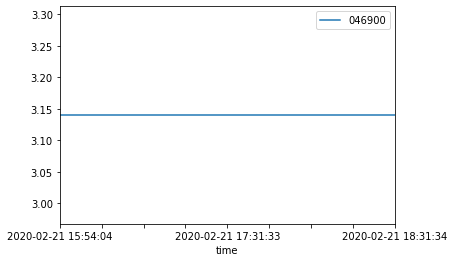

In [62]:
stkno = '046900'
data = {'stkNo':stkno}
try:
    df_=pd.read_csv(stkno+'.csv')
except:
    df_=0
for i in range(3):
    html = requests.post('https://www.twse.com.tw/zh/stockSearch/stockSearch',data=data)
    soup = BeautifulSoup(html.text, features='lxml')
    table = soup.find_all('table')
    df = pd.read_html(str(table[1]))
    df = df[0]
    df['證券代碼'] = stkno
    df['time'] = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
    try:
        df_= df_.append(df,ignore_index=True)
        df_= df_.dropna(axis=1,how='any')
        df_.to_csv(stkno+'.csv')
    except:
        df_=df
    print('\r',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()),end='')
    time.sleep(3600)
df_.plot(x='time',y=u'本日漲停',label=stkno)

In [5]:
import matplotlib.pyplot as plt

In [48]:
df_=pd.read_csv(stkno+'.csv')

In [63]:
df_

,標的名稱,本日漲停,開盤競價基準,本日跌停,履約價格,每千單位認購(售)股數,每單位參考履約價值,交易方式,行情資訊,基本資料,上限價格,下限價格,證券代碼,time
0,旺宏,3.14,2.06,0.98,29.0,306,2.02,普通交易,五檔資訊,公開資訊觀測站,無,無,046900,2020-02-21 15:54:04
1,旺宏,3.14,2.06,0.98,29.0,306,2.02,普通交易,五檔資訊,公開資訊觀測站,無,無,046900,2020-02-21 17:31:33
2,旺宏,3.14,2.06,0.98,29.0,306,2.02,普通交易,五檔資訊,公開資訊觀測站,無,無,046900,2020-02-21 18:31:34


In [2]:
import tkinter as tk
import time
import pandas as pd
import urllib.request as urlopen
from bs4 import BeautifulSoup
import requests

In [6]:
window = tk.Tk()
window.title('get stock')
window.geometry('400x600')

def post_stkno():
    stkno = e.get()
    lb.insert('end',stkno)
l = tk.Label(window, text='請輸入證券代碼')
l.pack()

e = tk.Entry(window)
e.pack()

b = tk.Button(window, text='post',command=post_stkno)
b.pack()

lb = tk.Listbox(window, width=20, height=22)
lb.pack()

def del_stk():
    lb.delete(lb.curselection()[0])
b2 = tk.Button(window, text='delete',command=del_stk)
b2.pack()

var = tk.StringVar()
var.set('')
l2 = tk.Label(window, textvariable=var, bg='yellow',width=15,height=2)
l2.pack()

def update():
    F_update = False
    time_ = time.time()
    for i in range(lb.size()):
        stkno = lb.get(i)
        data = {'stkNo':stkno}
        try:
            df_=pd.read_csv(stkno+'.csv')
        except:
            df_=0
        html = requests.post('https://www.twse.com.tw/zh/stockSearch/stockSearch',data=data)
        soup = BeautifulSoup(html.text, features='lxml')
        table = soup.find_all('table')
        try:
            df = pd.read_html(str(table[1]))
        except:
            df = pd.read_html(str(table[0]))
        df = df[0]
        df['證券代碼'] = stkno
        df['time'] = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        try:
            df_= df_.append(df,ignore_index=True,sort=True)
            df_= df_.dropna(axis=1,how='any')
            df_.to_csv(stkno+'.csv')
        except:
            df_=df
            df_.to_csv(stkno+'.csv')
        var.set(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
    window.after(10000,update)
    
update()

b3 = tk.Button(window, text='update', command=update)
b3.pack()

window.mainloop()